In [456]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
tqdm.pandas()

In [538]:
df=pd.read_csv('../data/raw/car_details.csv')

In [458]:
df.sample(5)

,vehical_name,Registration Year,Insurance,Fuel Type,Seats,Kms Driven,RTO,Ownership,Engine Displacement,Transmission,Year of Manufacture,Engine,Power,Transmission .1,Drive Type,Mileage,Fuel,new_vehical_price,vehical_price,other_features
7615,2020 Tata Altroz XZ BSVI,2020,-,Petrol,5 Seats,"30,000 Kms",Secunderabad,First Owner,1199 cc,Manual,2020.0,1199 cc,86.83 bhp,Manual,NaN,19.33 kmpl,Petrol,New Car Price ₹8.88 Lakh,₹8.50 Lakh,"['Engine Start/Stop Button', 'Rear AC Vents', ..."
3889,2013 Mahindra XUV500 W4,2013,-,Diesel,7 Seats,"60,000 Kms",Dibrugarh,Second Owner,2179 cc,Manual,2013.0,2179 cc,140 bhp,Manual,FWD,15.1 kmpl,Diesel,New Car Price ₹13.15 Lakh,₹4.75 Lakh,['Rear AC Vents']
6319,2024 Hyundai Verna SX Turbo DCT,2024,-,Petrol,5 Seats,"10,000 Kms",TG08,First Owner,1482 cc,Automatic,2024.0,NaN,NaN,Automatic,NaN,NaN,NaN,New Car Price ₹19.94 Lakh,₹17.50 Lakh,[]
2205,2017 Maruti Swift Dzire LDI,2017,-,Diesel,5 Seats,"63,000 Kms",begusarai,Second Owner,1248 cc,Manual,2017.0,1248 cc,74 bhp,Manual,NaN,26.59 kmpl,Diesel,New Car Price ₹7.89 Lakh,₹4 Lakh,[]
599,2017 Honda Jazz 1.2 E i VTEC,Jun 2017,Comprehensive,Petrol,5 Seats,"70,000 Kms",Surat,First Owner,1199 cc,Manual,2017.0,NaN,NaN,Manual,NaN,NaN,NaN,New Car Price ₹6.74 Lakh,₹5.41 Lakh Make Your Offer,[]


In [459]:
df.isnull().mean()*100

vehical_name             0.000000
Registration Year        0.254304
Insurance                0.000000
Fuel Type                0.000000
Seats                    0.117371
Kms Driven               0.000000
RTO                      6.523865
Ownership                0.029343
Engine Displacement      0.841158
Transmission             0.000000
Year of Manufacture      0.224961
Engine                  28.198357
Power                   30.575117
Transmission .1          0.000000
Drive Type              78.022300
Mileage                 33.401800
Fuel                    39.749609
new_vehical_price        0.000000
vehical_price            0.000000
other_features           0.000000
dtype: float64

# Vehical name and Registration year handling

In [460]:
# Vehical name is made of three things 1st- registration year 2nd- company name 3rd- model name
# registration name is already present as a col so i will create two new columns for the rest of things
# registration year contain some null values we will try to figure it out using vehical name

In [461]:
df.loc[df['Registration Year '].isnull(),'Registration Year ']=df[df['Registration Year '].isnull()]['vehical_name'].apply(lambda x:x.split(" ")[0]).values

In [462]:
df['Registration Year '].apply(lambda x:len(x.strip().split())).value_counts()*100/df.shape[0]

Registration Year 
1    70.921362
2    29.078638
Name: count, dtype: float64

In [463]:
# only 30% of the Registration year values contain month , registration month is not very much required and also we can fill it for all 
# rows so storing only year
df['Registration Year ']=df['Registration Year '].apply(lambda x:int(x.strip().split()[-1]))

In [464]:
# company name
df['company_name']=df['vehical_name'].apply(lambda x:x.split(" ")[1])

In [465]:
df['model_detail']=df['vehical_name'].apply(lambda x:' '.join(x.split(" ")[2:]))

# Insurance column handling

In [466]:
df['Insurance '].value_counts()

Insurance 
-                8108
Comprehensive    1703
Third Party       321
Zero Dep           92
Name: count, dtype: int64

In [467]:
df['Insurance ']=np.where(df['Insurance ']=="-",'No Insurance',df['Insurance '])

# Seats coulmn handling

In [468]:
df['Seats '].value_counts()

Seats 
5 Seats     8250
7 Seats     1472
4 Seats      161
6 Seats      155
8 Seats      121
9 Seats       30
2 Seats       12
10 Seats      11
Name: count, dtype: int64

In [469]:
# One way to handle null seat values is to fill them with the seat values of other cars that have exact same vehical name but in this case all 
# those columns where seat is null are unique and also the no of missing rows is only 0.11% which is not significant so i am dropping them
df.dropna(subset='Seats ',inplace=True)

# Handling kms driven

In [470]:
df.columns

Index(['vehical_name', 'Registration Year ', 'Insurance ', 'Fuel Type ',
       'Seats ', 'Kms Driven ', 'RTO ', 'Ownership ', 'Engine Displacement ',
       'Transmission ', 'Year of Manufacture ', 'Engine ', 'Power ',
       'Transmission .1', 'Drive Type ', 'Mileage ', 'Fuel ',
       'new_vehical_price', 'vehical_price', 'other_features', 'company_name',
       'model_detail'],
      dtype='object')

In [471]:
df['Kms Driven ']=df['Kms Driven '].apply(lambda x:int(x.replace(',','').strip().split(' ')[0]))

# Handling Engine Displacement

In [472]:
df['Engine Displacement ']=df['Engine Displacement '].fillna("-1")
df['Engine Displacement ']=df['Engine Displacement '].apply(lambda x:int(x.strip().split(" ")[0]))

<Axes: xlabel='Engine Displacement ', ylabel='Density'>

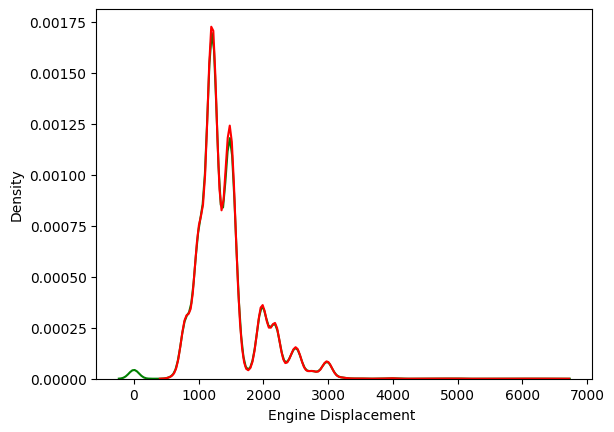

In [473]:
# import warnings
# warnings.filterwarnings("ignore")
sns.distplot(df['Engine Displacement '],hist=False,color='green')
sns.distplot(np.where(df['Engine Displacement ']==-1,df['Engine Displacement '].mean(),df['Engine Displacement ']),hist=False,color='red')

In [474]:
# filling by mean do'nt distrub the distibution so filling null values by mean
df['Engine Displacement in cc']=np.where(df['Engine Displacement ']==-1,df['Engine Displacement '].mean(),df['Engine Displacement '])

# Handling ownership

In [475]:
df['Ownership '].value_counts()

Ownership 
First Owner     6589
Second Owner    2504
Third Owner      781
Fourth Owner     224
Fifth Owner      111
Name: count, dtype: int64

In [476]:
df['Ownership '].isnull().sum()

np.int64(3)

In [477]:
df['Ownership ']=df['Ownership '].fillna('First Owner')

# Handling Year of Manufacture

In [478]:
# dropping null values
df['Year of Manufacture '].isnull().sum()

np.int64(23)

In [479]:
df.dropna(subset='Year of Manufacture ',inplace=True)
df['Year of Manufacture ']=df['Year of Manufacture '].apply(lambda x:int(x))

# Handling Engine

In [480]:
# engine ,engine displacement and fuel and fuel type both are same so dropping whole col

In [481]:
df.drop(columns=['Fuel ','Engine '],axis=1,inplace=True)

# Handling new_vehical_price column

In [482]:
df['new_vehical_price'].sample(5)

1468     New Car Price ₹6.91 Lakh
9072     New Car Price ₹4.73 Lakh
6523    New Car Price ₹10.64 Lakh
5010     New Car Price ₹5.51 Lakh
1505     New Car Price ₹7.03 Lakh
Name: new_vehical_price, dtype: object

In [483]:
df['new_vehical_price'].apply(lambda x:x.split(' ')[-1]).value_counts()

new_vehical_price
Lakh     10093
Crore       96
Name: count, dtype: int64

In [484]:
def convert_price(prc):
    x=prc.replace('New Car Price','').replace('₹','').strip()
    crore=x.split()[-1]=='Crore'
    if crore:
        x=float(x.replace("Crore",'').strip())*100
    else:
        x=float(x.replace("Lakh",'').strip())
    return round(x,2)

In [485]:
df['new_vehical_price']=df['new_vehical_price'].apply(convert_price)

In [486]:
df.rename(columns={"new_vehical_price":"new_vehical_price_in_lakh_inr"},inplace=True)

# Handling price col

In [487]:
df['vehical_price'].sample(5)

9833                       ₹9 Lakh 
2789       ₹14 Lakh Make Your Offer
9947                    ₹9.70 Lakh 
1695    ₹13.70 Lakh Make Your Offer
267      ₹3.25 Lakh Make Your Offer
Name: vehical_price, dtype: object

In [488]:
df['vehical_price'].apply(lambda x:x.split(' ')[1]).value_counts()

vehical_price
Lakh        9928
Thousand     228
Crore         33
Name: count, dtype: int64

In [489]:
df['vehical_price'].apply(lambda x:x.replace('Make Your Offer','').replace('₹','').strip().split()[1]).value_counts()

vehical_price
Lakh        9928
Thousand     228
Crore         33
Name: count, dtype: int64

In [490]:
def convert_price(prc):
    x=prc.replace('Make Your Offer','').replace('₹','').strip()
    crore=x.split()[1]=='Crore'
    thousand=x.split()[1]=='Thousand'
    if crore:
        x=float(x.replace("Crore",'').strip())*100
    elif thousand:
        x=float(x.replace("Thousand",'').strip())/100
    else:
        x=float(x.replace("Lakh",'').strip())
    return round(x,2)

In [491]:
df['vehical_price']=df['vehical_price'].apply(convert_price)

In [492]:
df.rename(columns={"vehical_price":"vehical_price_in_lakh_inr"},inplace=True)

# Handling Power

In [493]:
df.loc[df['Power '].isnull()==False,'Power ']=df[df['Power '].isnull()==False]['Power '].apply(lambda x:float(x.strip().split(' ')[0]))

In [494]:
df.rename(columns={"Power ":"Power in bhp"},inplace=True)

In [495]:
# i am going to replace null values of power with avergae of vehicales who have same name

In [496]:
def handleNull(row):
    row['Power in bhp']=df[(df['vehical_name']==row['vehical_name']) & (df['Power in bhp'].isnull()==False)]['Power in bhp'].mean()
    return row

In [497]:
df.loc[df['Power in bhp'].isnull(),'Power in bhp']=df[df['Power in bhp'].isnull()].apply(handleNull,axis=1)

In [498]:
df['Power in bhp'].isnull().mean()*100

np.float64(13.98567082147414)

In [499]:
# now 14% rows have Power as null and are also unique
# now i am going to fill them by those whose orignal price is in almost same range(+- 1.5 lakh)

In [500]:
def handleNull2(row):
    row['Power in bhp']=df[(df['new_vehical_price_in_lakh_inr']>row['new_vehical_price_in_lakh_inr']-1) & (df['new_vehical_price_in_lakh_inr']<row['new_vehical_price_in_lakh_inr']+1)]['Power in bhp'].mean()
    return row

In [501]:
df.loc[df['Power in bhp'].isnull(),'Power in bhp']=df[df['Power in bhp'].isnull()].apply(handleNull2,axis=1)

In [502]:
df['Power in bhp'].isnull().mean()*100

np.float64(0.1177740700755717)

In [503]:
# repeating same logic but now range is +-4lakh

In [504]:
def handleNull3(row):
    row['Power in bhp']=df[(df['new_vehical_price_in_lakh_inr']>row['new_vehical_price_in_lakh_inr']-4) & (df['new_vehical_price_in_lakh_inr']<row['new_vehical_price_in_lakh_inr']+4)]['Power in bhp'].mean()
    return row

In [505]:
df[df['Power in bhp'].isnull()].apply(handleNull3,axis=1)['Power in bhp'].isnull().sum()

np.int64(2)

In [506]:
#dropping last 3 values
df.dropna(subset=['Power in bhp'],inplace=True)

# Handling drive type

In [507]:
# almost 80% data is missing so we can't fill it using some stats and then expect that it will give good results so dopping this col
df.drop(columns=['Drive Type '],axis=1,inplace=True)

# Handling Mileage

In [508]:
df[df['Mileage '].isnull()==False]['Mileage '].apply(lambda x:x.strip().split()[-1]).value_counts()

Mileage 
kmpl     6519
km/kg     276
Name: count, dtype: int64

In [509]:
def handle_mil(mil):
    try:
        return float(mil.strip().split()[0])
    except:
        return mil

In [510]:
df['Mileage ']=df['Mileage '].apply(handle_mil)

In [511]:
df.rename(columns={"Mileage ":"Mileage in kmpl or km/kg"},inplace=True)

__*mileage of cars decrease overtime ,it also depend on the price of car and it also depends on the maintainence of the car. so one way to fill null values is to fill them with the average of cars having appraox same age,same fuel type,same vehical model,of approximately same technology(like registration year depict wich time's tech is used in it)*__

__*Testing above hypothesis for known values*__

In [512]:
df_org=df.copy()

In [513]:
def handleNull_mileage(row):
    row['Mileage in kmpl or km/kg']=df[(df['Fuel Type ']==row['Fuel Type '])
        &(df['vehical_name']==row['vehical_name']) & 
        (df['Mileage in kmpl or km/kg'].isnull()==False) &
        (df['Registration Year ']>row['Registration Year ']-5) 
        & (df['Registration Year ']<row['Registration Year ']+5) 
        &(df['Year of Manufacture ']<row['Year of Manufacture ']+2)
        & (df['Year of Manufacture ']>row['Year of Manufacture ']-2)]['Mileage in kmpl or km/kg'].mean()
    return row

In [514]:
mod_vals=df[df['Mileage in kmpl or km/kg'].isnull()==False].progress_apply(handleNull_mileage,axis=1)['Mileage in kmpl or km/kg']

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6795/6795 [00:41<00:00, 165.11it/s]


In [515]:
hyp=pd.DataFrame(np.concatenate([df[df['Mileage in kmpl or km/kg'].isnull()==False]['Mileage in kmpl or km/kg'].values.reshape(len(mod_vals),1),mod_vals.values.reshape(len(mod_vals),1)],axis=1),columns=['old_values','new_values'])

In [516]:
hyp[hyp['old_values']!=hyp['new_values']].sample(5)

,old_values,new_values
5807,25.10,25.100000
3607,22.74,22.740000
4049,22.90,22.900000
5089,18.90,18.900000
1257,20.70,19.157143


__*using above results we can say that hypothesis work good enogh*__

In [517]:
df.loc[df['Mileage in kmpl or km/kg'].isnull(),['Mileage in kmpl or km/kg']]=df[df['Mileage in kmpl or km/kg'].isnull()].progress_apply(handleNull_mileage,axis=1)['Mileage in kmpl or km/kg']

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3382/3382 [00:20<00:00, 168.80it/s]


In [518]:
df['Mileage in kmpl or km/kg'].isnull().mean()*100

np.float64(17.30372408371819)

In [519]:
df_org2=df.copy()

__*initially 33% values were missing now it is reduced to 17%*__
__*for remaining i am going to replace them by the mean of values of same new_price range and same asking price range and same maifaturing year*__
__*now the below function will apply the above statement and also increase the range until null values reaches below a given threshold*__

In [520]:
df=df_org2.copy()

In [521]:
def handleNull_mileage2(row):
    global i
    row['Mileage in kmpl or km/kg']=df[(df['Fuel Type ']==row['Fuel Type ']) & 
        (df['Mileage in kmpl or km/kg'].isnull()==False) &
        (df['Registration Year ']>row['Registration Year ']-3*i) & 
        (df['Registration Year ']<row['Registration Year ']+3*i) &
        (df['Year of Manufacture ']<row['Year of Manufacture ']+2*i) &
        (df['Year of Manufacture ']>row['Year of Manufacture ']-2*i) &
        (df['new_vehical_price_in_lakh_inr']>row['new_vehical_price_in_lakh_inr']-1.5*i) &
        (df['new_vehical_price_in_lakh_inr']<row['new_vehical_price_in_lakh_inr']+1.5*i)&
        (df['vehical_price_in_lakh_inr']<row['vehical_price_in_lakh_inr']+0.25*i)&
        (df['vehical_price_in_lakh_inr']>row['vehical_price_in_lakh_inr']-0.25*i)
        ]['Mileage in kmpl or km/kg'].mean()
    return row

In [522]:
i=1 #defining i globally
def fill_mileage(no_of_iter):
    global i
    n=df['Mileage in kmpl or km/kg'].isnull().mean()*100
    count=1
    while(count<no_of_iter+1):
        print("interation no ",count,' % of null values',n)
        df.loc[df['Mileage in kmpl or km/kg'].isnull(),['Mileage in kmpl or km/kg']]=df[df['Mileage in kmpl or km/kg'].isnull()].progress_apply(handleNull_mileage2,axis=1)['Mileage in kmpl or km/kg']
        i+=1
        count+=1
        n=df['Mileage in kmpl or km/kg'].isnull().mean()*100

In [523]:
fill_mileage(10)

interation no  1  % of null values 17.30372408371819


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1761/1761 [00:09<00:00, 189.45it/s]


interation no  2  % of null values 6.730863712292424


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 685/685 [00:03<00:00, 196.67it/s]


interation no  3  % of null values 4.539648226392846


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 201.37it/s]


interation no  4  % of null values 3.763388031836494


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 383/383 [00:01<00:00, 192.97it/s]


interation no  5  % of null values 3.222953719170679


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 328/328 [00:01<00:00, 204.91it/s]


interation no  6  % of null values 2.7021715633290757


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 275/275 [00:01<00:00, 207.03it/s]


interation no  7  % of null values 2.3287805836690576


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 237/237 [00:01<00:00, 210.66it/s]


interation no  8  % of null values 2.0733025449543088


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 211/211 [00:01<00:00, 203.44it/s]


interation no  9  % of null values 1.9357374471848285


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 197/197 [00:00<00:00, 200.22it/s]


interation no  10  % of null values 1.7588680357669255


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 179/179 [00:00<00:00, 198.81it/s]


__*dropiing left values*__

In [524]:
df.dropna(subset=['Mileage in kmpl or km/kg'],inplace=True)

# Handling rto

In [532]:
df['RTO ']=df['RTO '].fillna('Others')

In [534]:
df.to_csv("../data/processed/preprocessed.csv",index=False)